# P152_G5_Project_1_Classification

### Business Objective:
The variable to be predicted has two values (positive or negative on diabetic retinopathy). Thus, this is a binary classification project. The goal here is to predict whether a patient will suffer from diabetic retinopathy or not, conditioned on blood test features.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

#### 1. Importing the data

In [4]:
data = pd.read_csv('pronostico_dataset_m1.csv')
data

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [5]:
data_1 = data.drop('ID', axis =1)
data_1

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy


#### 2. Data Understanding

In [16]:
data_1.shape

(6000, 5)

In [7]:
data_1.isnull().sum()

age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [8]:
data_1.dtypes

age             float64
systolic_bp     float64
diastolic_bp    float64
cholesterol     float64
prognosis        object
dtype: object

In [9]:
data_1.describe()

,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,60.464121,100.694822,90.505547,100.628255
std,8.564392,10.669267,9.648200,10.433915
min,35.164761,69.675429,62.807105,69.967453
25%,54.371941,93.267420,83.641788,93.202373
50%,59.831159,100.119926,89.912429,100.060637
75%,65.809652,107.439501,96.682405,107.250829
max,103.279497,151.699660,133.456382,148.233544


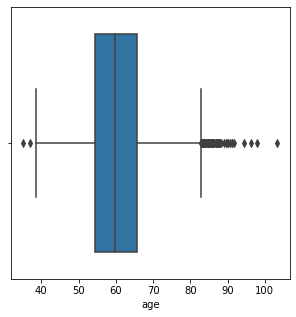

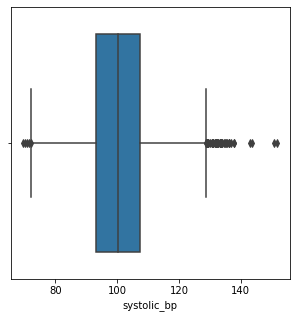

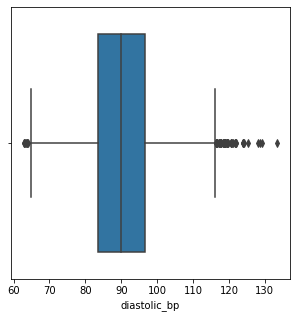

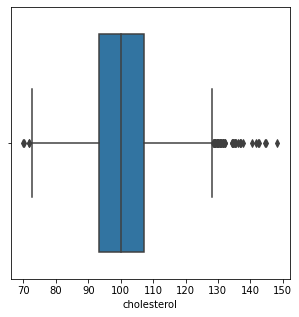

In [14]:
fig, a = plt.subplots(figsize=(5, 5))
a = sns.boxplot(data_1['age'])
fig, b = plt.subplots(figsize=(5, 5))
b = sns.boxplot(data_1['systolic_bp'])
fig, c = plt.subplots(figsize=(5, 5))
c = sns.boxplot(data_1['diastolic_bp'])
fig, d = plt.subplots(figsize=(5, 5))
d = sns.boxplot(data_1['cholesterol'])

In [19]:
stats.skew(data_1['age']),stats.skew(data_1['systolic_bp']),stats.skew(data_1['diastolic_bp']),stats.skew(data_1['cholesterol'])

(0.44103022793961805,
 0.3345710437232818,
 0.3364706951380214,
 0.3614239343849043)

In [20]:
stats.kurtosis(data_1['age']),stats.kurtosis(data_1['systolic_bp']),stats.kurtosis(data_1['diastolic_bp']),stats.kurtosis(data_1['cholesterol'])

(0.27377627961884565,
 0.21152590580286867,
 0.16105310512609083,
 0.2583780161986309)

In [11]:
data_1['prognosis'].value_counts()

retinopathy       3087
no_retinopathy    2913
Name: prognosis, dtype: int64

In [22]:
data_1_corr = data_1.corr()

<AxesSubplot:>

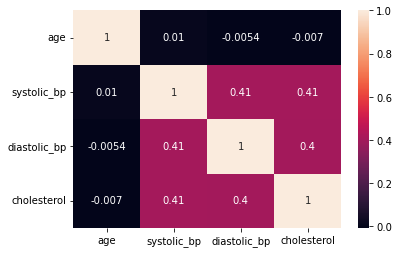

In [23]:
sns.heatmap(data_1_corr, annot=True)

### Doubts - 
1. is there any validation data ? to decide train - test - validation 
2. if possible can we use tableau or powerbi to present the reports
3. what are different option to deploy the model other than flask ans streamlit

In [24]:
data_1.info

<bound method DataFrame.info of             age  systolic_bp  diastolic_bp  cholesterol       prognosis
0     77.196340    85.288742     80.021878    79.957109     retinopathy
1     63.529850    99.379736     84.852361   110.382411     retinopathy
2     69.003986   111.349455    109.850616   100.828246     retinopathy
3     82.638210    95.056128     79.666851    87.066303     retinopathy
4     78.346286   109.154591     90.713220    92.511770     retinopathy
...         ...          ...           ...          ...             ...
5995  49.611850    94.857639     86.615671   107.643986  no_retinopathy
5996  63.099686   100.039527     93.515186   104.971404     retinopathy
5997  55.562243    98.421446    102.697875   120.875951     retinopathy
5998  63.468956   106.809289     88.060631   106.052213     retinopathy
5999  62.506825    96.900784     86.878033   108.625436  no_retinopathy

[6000 rows x 5 columns]>